***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
SM = 788
classes = [0, 2*SM, 5*SM, 15*SM, 25*SM, dados.Renda.max()]


### 2º Definir os labels das classes

In [5]:
labels = ['E', 'D', 'C', 'B', 'A']


### 3º Construir a coluna de frequências

In [6]:
renda_classe_quantidade = pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True).value_counts().sort_index(ascending=False)
renda_classe_quantidade

A      420
B      822
C     7241
D    18602
E    49755
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [7]:
renda_classe_percentual = pd.cut(x = dados.Renda,
      bins = classes,
      labels = labels,
      include_lowest = True).value_counts(normalize=True).sort_index(ascending = False) *100
renda_classe_percentual

A     0.546590
B     1.069755
C     9.423477
D    24.208745
E    64.751432
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
renda_por_classe = pd.DataFrame({'Quantidade' : renda_classe_quantidade , 'Percentual (%)' : renda_classe_percentual})
renda_por_classe

,Quantidade,Percentual (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

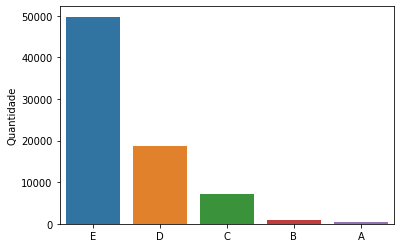

In [9]:
sns.barplot(x = renda_por_classe.index , y = renda_por_classe.Quantidade)

> ### Conclusões

Escreva suas conclusões aqui...

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

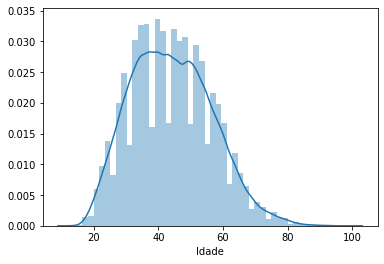

In [10]:
'''var. quantitativas = [Idade, Renda, Altura]'''
sns.distplot(dados.Idade)


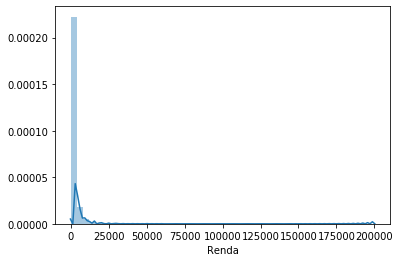

In [11]:
sns.distplot(dados.Renda)

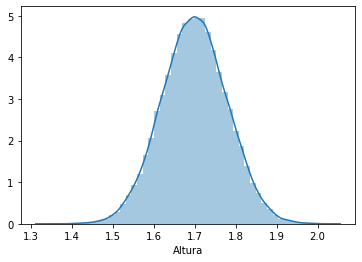

In [12]:
sns.distplot(dados.Altura)

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

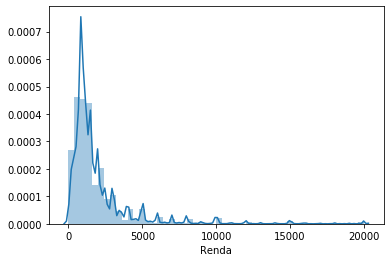

In [13]:
sns.distplot( dados.Renda[dados.Renda <= 20000] )

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [14]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [15]:
pd.crosstab(dados.Cor, dados.Sexo).rename(index = cor, columns = sexo)

Sexo,Masculino,Feminino
Cor,,
Indígena,256,101
Branca,22194,9621
Preta,5502,2889
Amarela,235,117
Parda,25063,10862


In [16]:
pd.crosstab(dados.Cor, dados.Sexo, normalize=True).rename(index = cor, columns = sexo) *100

Sexo,Masculino,Feminino
Cor,,
Indígena,0.333160,0.131442
Branca,28.883394,12.520822
Preta,7.160333,3.759761
Amarela,0.305830,0.152264
Parda,32.617126,14.135867


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [17]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [18]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [19]:
dados.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [20]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [21]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [22]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [23]:
    # por 'default', o aggfunc contabiliza a frequência dos dados
    # ao passarmos um parâmetro de 'value', nós acabamos por aplicar todas as funções escritas no aggfunc sobre o value e
# montamos uma tabela cruzada de 'index' vs 'columns' com o preenchimento sendo o resultado do aggfunc sobre o 'value'
SexoCor_renda = pd.crosstab(index = dados.Cor, columns = dados.Sexo, values = dados.Renda, aggfunc=['mean', 'median', 'max'])
SexoCor_renda.rename(index = cor, columns = sexo)

mean                 median                max         
Sexo        Masculino     Feminino Masculino Feminino Masculino Feminino
Cor                                                                     
Indígena  1081.710938  2464.386139     797.5    788.0     10000   120000
Branca    2925.744435  2109.866750    1700.0   1200.0    200000   100000
Preta     1603.861687  1134.596400    1200.0    800.0     50000    23000
Amarela   4758.251064  3027.341880    2800.0   1500.0     50000    20000
Parda     1659.577425  1176.758516    1200.0    800.0    100000    30000

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [24]:
dispersao_SexoCor_renda = pd.crosstab(dados.Cor, dados.Sexo, values = dados.Renda, aggfunc = ['mad', 'var', 'std'])
dispersao_SexoCor_renda.rename(index = cor, columns = sexo)

mad                        var                        std  \
Sexo        Masculino     Feminino     Masculino      Feminino    Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1.449841e+06  1.429818e+08  1204.093490   
Branca    2261.012346  1670.967106  2.257002e+07  1.056909e+07  4750.791872   
Preta      975.602482   705.453357  3.749294e+06  1.821960e+06  1936.309271   
Amarela   3709.597211  2549.146322  3.295707e+07  1.392166e+07  5740.824820   
Parda     1125.827704   811.580946  5.345747e+06  2.547960e+06  2312.087184   

                        
Sexo          Feminino  
Cor                     
Indígena  11957.498292  
Branca     3251.013154  
Preta      1349.799809  
Amarela    3731.173660  
Parda      1596.233048

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

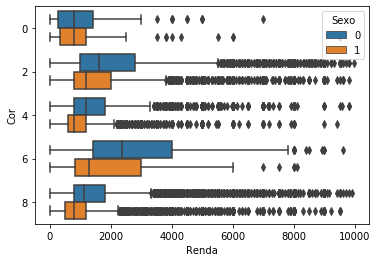

In [37]:
sns.boxplot(y = dados.Cor, x = dados.Renda[dados.Renda < 10000], hue = dados.Sexo, orient = 'h')

In [26]:
dados.Renda[dados.Renda < 10000]

0         800
1        1150
2         880
3        3500
4         150
         ... 
76835     812
76836    1500
76837    1300
76838    1500
76839     900
Name: Renda, Length: 74836, dtype: int64

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [27]:
from scipy import stats
stats.percentileofscore(dados.Renda, 788, 'weak')


28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [28]:
renda_quartis = dados.Renda.quantile([ i/100 for i in range(1,100) ])*100
#esse valor conta até os 99%
# ou dados.Renda.quantile(.99)

In [29]:
print(f'99% ganham abaixo de {renda_quartis.max()}')

99% ganham abaixo de 1500000.0


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [30]:
pd.crosstab(dados['Anos de Estudo'] , dados.Sexo, values = dados.Renda, aggfunc = ['mean', 'median', 'max', 'std'])

mean              median           max          \
Sexo                      0            1      0     1       0       1   
Anos de Estudo                                                          
1                799.494638   516.201748    700   390   30000   10000   
2                895.629047   492.771987    788   400   30000    2000   
3                931.178986   529.911638    788   450   40000    4000   
4               1109.203862   546.853916    800   500   80000    3500   
5               1302.329283   704.279111   1000   788   50000   10000   
6               1338.653218   781.389776   1045   788   35000    8000   
7               1448.875419   833.732824   1200   788   25000    6000   
8               1465.497940   830.751004   1200   788   40000    9000   
9               1639.396667   933.615351   1300   800   30000   18000   
10              1508.038850   868.021700   1200   788   60000   20000   
11              1731.270847   925.919225   1218   800   45000    6000   
12              2117.060504  1286.790889   1500  1000  200000  100000   
13              2470.330776  1682.313725   1800  1200   30000  120000   
14              3195.099154  1911.730047   2400  1300   25000   20000   
15              3706.620269  2226.460457   2500  1600   50000   20000   
16              6134.279790  3899.513231   4000  2800  200000  100000   
17              1295.761905   798.174419   1200   788    7000    3000   

                        std               
Sexo                      0            1  
Anos de Estudo                            
1               1023.904884   639.311534  
2               1331.950552   425.291842  
3               1435.173827   498.234168  
4               2143.800133   424.124446  
5               1419.821787   629.553397  
6               1484.650587   635.782641  
7               1476.628602   574.547028  
8               1419.708673   602.038029  
9               1515.583715   896.781213  
10              2137.664774   973.221652  
11              2078.609734   620.611907  
12              2676.538942  1819.040417  
13              2268.081538  4851.833513  
14              2797.116800  2053.789771  
15              3987.214974  2064.083336  
16              7447.613594  4212.770709  
17               979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

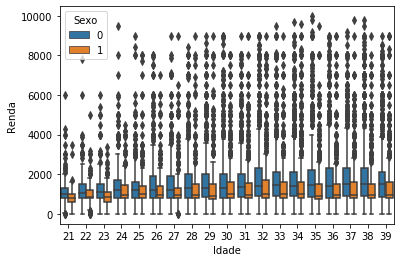

In [31]:
sns.boxplot( x = dados[ (dados.Idade > 20) & (dados.Idade < 40)  ].Idade , 
            y = dados.Renda[dados.Renda < 10000], 
            hue = dados.Sexo 
           ) 
# nesse ponto aqui, criamos um filtro com um fator "and" e, depois, selecionamos a coluna 'Idade'
# poderia ter sido feito algo com o query, como segue
# dados.query('Idade > 20 and Idade < 40').Idade

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [32]:
dados.groupby(['UF']).agg( {'Renda':['mean', 'median', 'max', 'std']} )

Renda                            
           mean median     max          std
UF                                         
11  1789.761223   1200   50000  2406.161161
12  1506.091782    900   30000  2276.233415
13  1445.130100    900   22000  1757.935591
14  1783.588889   1000   20000  2079.659238
15  1399.076871    850   50000  2053.779555
16  1861.353516   1200   15580  2020.688632
17  1771.094946   1000   60000  2934.590741
21  1019.432009    700   30000  1887.816905
22  1074.550784    750   40000  2373.355726
23  1255.403692    789   25000  1821.963536
24  1344.721480    800   15500  1651.805500
25  1293.370487    788   30000  1950.272431
26  1527.079319    900   50000  2389.622497
27  1144.552602    788   11000  1237.856197
28  1109.111111    788   16000  1478.997878
29  1429.645094    800  200000  3507.917248
31  2056.432084   1200  100000  3584.721547
32  2026.383852   1274  100000  3513.846868
33  2496.403168   1400  200000  5214.583518
35  2638.104986   1600   80000  3503.777366
41  2493.870753   1500  200000  4302.937995
42  2470.854945   1800   80000  3137.651112
43  2315.158336   1500   35000  2913.335783
50  2262.604167   1500   42000  3031.419122
51  2130.652778   1500   35000  2542.630178
52  1994.580794   1500   30000  2221.933065
53  4241.954722   2000  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

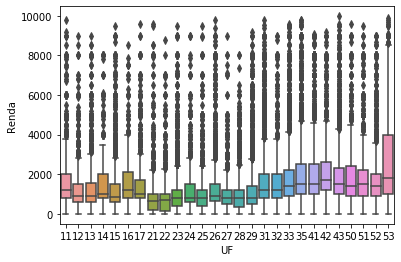

In [33]:
sns.boxplot( x = dados.UF , y = dados.query('Renda < 10000').Renda )

> ### Conclusões

Escreva suas conclusões aqui...